In [560]:
import pandas as pd
from sklearn import tree 
import matplotlib.pyplot as plt 
df = pd.read_csv("game data.csv")

In [561]:
df


,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [562]:
df.drop('Days', axis=1, inplace=True)

In [563]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [564]:
x = df.drop('Wear Jacket?', axis=1)

In [565]:
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [566]:
y = df['Wear Jacket?']

In [567]:
y

0     No
1    Yes
2     No
3    Yes
4    Yes
5     No
6     No
7     No
Name: Wear Jacket?, dtype: object

In [568]:
df.value_counts()

Outlook  Temprature  Routine  Wear Jacket?
Cloudy   Cold        Indoor   Yes             1
                     Outdoor  Yes             1
         Warm        Indoor   No              1
                     Outdoor  No              1
Sunny    Cold        Indoor   No              1
                     Outdoor  Yes             1
         Warm        Indoor   No              1
                     Outdoor  No              1
Name: count, dtype: int64

In [569]:
df.Outlook.value_counts()

Outlook
Sunny     4
Cloudy    4
Name: count, dtype: int64

In [570]:
df.Temprature.value_counts()

Temprature
Cold    4
Warm    4
Name: count, dtype: int64

In [571]:
df.Routine.value_counts()

Routine
Indoor     4
Outdoor    4
Name: count, dtype: int64

# Encode

Outlook -> Cloudy= 1, Sunny = 0 <br> 
Temprature -> Cold = 1 , Warm = 0 <br>
Routine -> Indoor= 1, Outdoor = 0 <br>

## Replace with numerical value

In [572]:
x = x.replace({'Cloudy':1, 'Sunny':0, 'Cold':1, 'Warm':0, 'Indoor ':1, 'Outdoor':0 })
#x = x.replace({'Cloudy':0, 'Sunny':1, 'Warm': 1, 'Cold': 0, 'Outdoor':1,'Indoor ': 0 })

In [573]:
x

,Outlook,Temprature,Routine
0,0,1,1
1,1,1,1
2,1,0,0
3,0,1,0
4,1,1,0
5,0,0,0
6,1,0,1
7,0,0,1


In [574]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [575]:
clf.fit(x,y)

DecisionTreeClassifier()

In [576]:
#Sunny, cold, indoor
clf.predict([[0,1,1]])

C:\Users\rashe\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [577]:
#Sunny, warm, indoor
clf.predict([[0,0,1]])

C:\Users\rashe\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [578]:
#sunny, cold, outdoor
clf.predict([[0,1,0]])

C:\Users\rashe\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

[Text(0.4, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.625, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.375, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

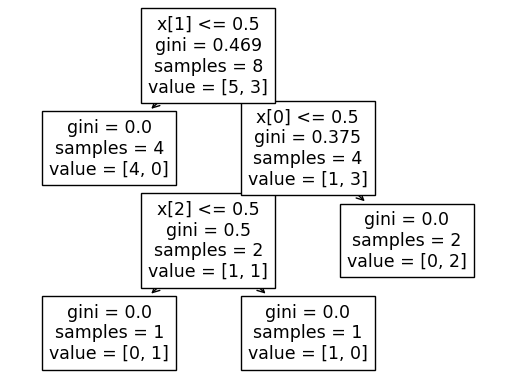

In [579]:
tree.plot_tree(clf)

[Text(0.4, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

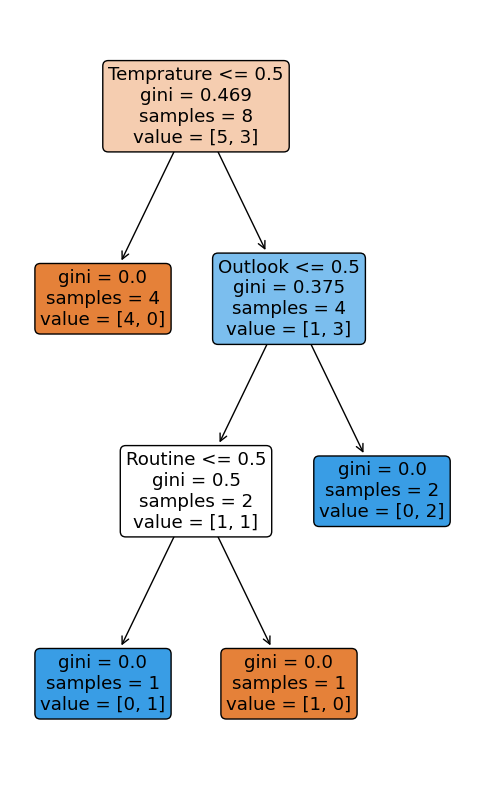

In [580]:
plt.figure(figsize=(6,10))
tree.plot_tree(clf, feature_names=x.columns, filled=True, rounded=True)